In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('churn_data.csv')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1=pd.read_csv('customer_data.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df2=pd.read_csv('internet_data.csv')
df2.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df3=pd.merge(df,df1,on='customerID')

In [7]:
telecom=pd.merge(df3,df2,on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
telecom.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
#telecom.PhoneService=telecom.PhoneService.map({'Yes':1,'No':0})

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
for v in telecom.columns:
    print()
    print(v,'-->',telecom[v].unique())



customerID --> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService --> ['No' 'Yes']

Contract --> ['Month-to-month' 'One year' 'Two year']

PaperlessBilling --> ['Yes' 'No']

PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges --> ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn --> ['No' 'Yes']

gender --> ['Female' 'Male']

SeniorCitizen --> [0 1]

Partner --> ['Yes' 'No']

Dependents --> ['No' 'Yes']

MultipleLines --> ['No phone service' 'No' 'Yes']

InternetService --> ['DSL' 'Fiber optic' 'No']

OnlineSecurity --> ['No' 'Yes' 'No internet service']

Onlin

In [14]:
vars=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def bin_mapping(x):
    return x.map({'Yes':1,'No':0})
telecom[vars]=telecom[vars].apply(bin_mapping)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [16]:
d1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

In [17]:
telecom=pd.concat([telecom,d1],axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [18]:
telecom.drop(['Contract','PaymentMethod','gender','InternetService'],axis=1,inplace=True)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,No,No,0,0,0,1,0,0,1,0


In [20]:
m1=pd.get_dummies(telecom['MultipleLines'],prefix='MulitpleLines')
m1.head()

,MulitpleLines_No,MulitpleLines_No phone service,MulitpleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [21]:
m1.drop('MulitpleLines_No phone service',axis=1,inplace=True)

In [22]:
telecom=pd.concat([telecom,m1],axis=1)

In [23]:
for var in ['OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV']:
    m2=pd.get_dummies(telecom[var],prefix=var)
    telecom=pd.concat([telecom,m2],axis=1)

In [24]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [25]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MulitpleLines_No', 'MulitpleLines_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'Strea

In [26]:
telecom.drop(['OnlineBackup','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','OnlineBackup_No internet service','OnlineSecurity_No internet service','DeviceProtection_No internet service', 'TechSupport_No internet service','StreamingTV_No internet service','customerID','MultipleLines','StreamingMovies'],axis=1,inplace=True)

In [27]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.5,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [28]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   object 
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [29]:
telecom.TotalCharges=pd.to_numeric(telecom.TotalCharges,errors='coerce')

In [30]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [31]:
telecom.isna().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MulitpleLines_No                          0
MulitpleLines_Yes                         0
OnlineBackup_No                           0
OnlineBackup_Yes                          0
OnlineSecurity_No                         0
OnlineSecurity_Yes              

In [32]:
telecom['TotalCharges'].mean()

2283.3004408418697

In [33]:
telecom['TotalCharges']=telecom['TotalCharges'].fillna(telecom['TotalCharges'].mean())

feature scaling

In [34]:
x=telecom.drop('Churn',axis=1)
y=telecom['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
x_train.shape

(5634, 28)

In [36]:
y_train.shape

(5634,)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
4169,-0.705310,1,1,1.206336,-0.364971,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3571,0.108051,1,1,-0.095544,-0.083929,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1352,1.612768,0,0,-0.133785,0.995173,0,1,1,0,1,...,1,0,0,1,0,1,0,1,0,1
1278,0.148719,0,0,-0.142099,-0.023022,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,1
938,1.328092,1,1,1.432461,2.125701,0,1,0,1,0,...,0,1,1,0,0,1,0,1,0,1


<AxesSubplot:>

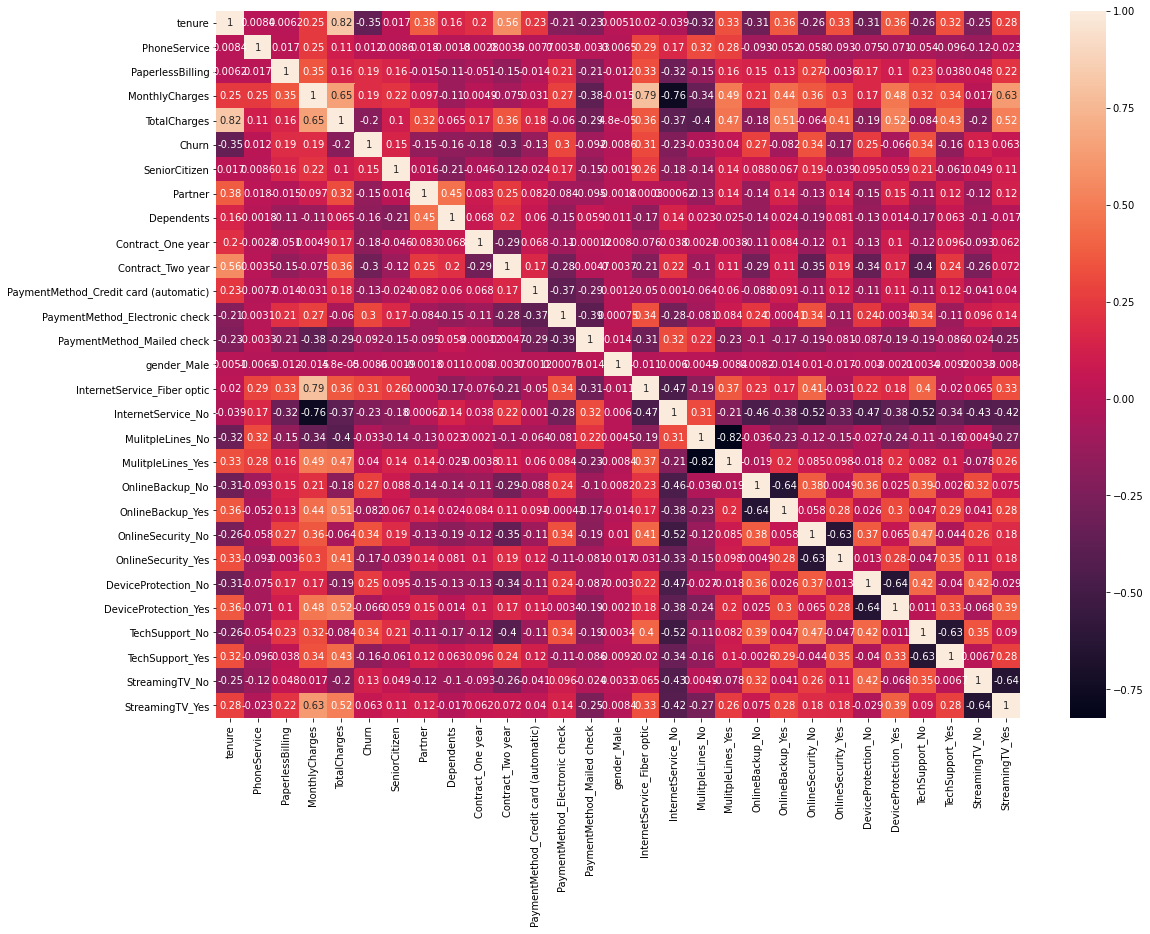

In [38]:
plt.figure(figsize=(18,13))
sns.heatmap(telecom.corr(),annot=True)

In [39]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [40]:
log1=sm.GLS(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.289
Model:                            GLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        21:46:45   Log-Likelihood:                -2457.3
No. Observations:                5634   AIC:                             4961.
Df Residuals:                    5611   BIC:                             5113.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.842e+11   1.91e+11      0.963      0.335   -1.91e+11    5.59e+11
tenure                                   -0.0393      0.014     -2.889      0.004      -0.066      -0.013
PhoneService                           1.316e+11   1.37e+11      0.963      0.335   -1.36e+11    3.99e+11
PaperlessBilling                          0.0479      0.011      4.285      0.000       0.026       0.070
MonthlyCharges                            0.1721      0.039      4.374      0.000       0.095       0.249
TotalCharges                             -0.1108      0.016     -6.781      0.000      -0.143      -0.079
SeniorCitizen                             0.0428      0.015      2.951      0.003       0.014       0.071
Partner                                   0.0061      0.012      0.509      0.611      -0.018       0.030
Dependents                               -0.0217      0.013     -1.686      0.092      -0.047       0.004
Contract_One year                        -0.1201      0.016     -7.649      0.000      -0.151      -0.089
Contract_Two year                        -0.0801      0.019     -4.216      0.000      -0.117      -0.043
PaymentMethod_Credit card (automatic)    -0.0100      0.015     -0.662      0.508      -0.040       0.020
PaymentMethod_Electronic check            0.0624      0.015      4.201      0.000       0.033       0.092
PaymentMethod_Mailed check               -0.0041      0.016     -0.253      0.800      -0.036       0.028
gender_Male                              -0.0014      0.010     -0.143      0.886      -0.021       0.018
InternetService_Fiber optic               0.0364      0.036      1.016      0.310      -0.034       0.107
InternetService_No                    -1.842e+11   1.91e+11     -0.963      0.335   -5.59e+11    1.91e+11
MulitpleLines_No                      -1.316e+11   1.37e+11     -0.963      0.335   -3.99e+11    1.36e+11
MulitpleLines_Yes                     -1.316e+11   1.37e+11     -0.963      0.335   -3.99e+11    1.36e+11
OnlineBackup_No                       -1.129e+11   1.17e+11     -0.963      0.335   -3.43e+11    1.17e+11
OnlineBackup_Yes                      -1.129e+11   1.17e+11     -0.963      0.335   -3.43e+11    1.17e+11
OnlineSecurity_No                      7.862e+10   8.16e+10      0.963      0.335   -8.14e+10    2.39e+11
OnlineSecurity_Yes                     7.862e+10   8.16e+10      0.963      0.335   -8.14e+10    2.39e+11
DeviceProtection_No                   -9.403e+10   9.76e+10     -0.963      0.335   -2.85e+11    9.73e+10
DeviceProtection_Yes                  -9.403e+10   9.76e+10     -0.963      0.335   -2.85e+11    9.73e+10
TechSupport_No                         6.974e+10   7.24e+10      0.963      0.335   -7.22e+10    2.12e+11
TechSuppo

RFE-- Recursive Feature Elimination

In [41]:
from sklearn.feature_selection import RFE

In [44]:
logreg=LogisticRegression()
rfe=RFE(logreg,15)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [45]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False])

In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 10),
 ('Dependents', False, 4),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 7),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 11),
 ('gender_Male', False, 14),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 6),
 ('MulitpleLines_No', True, 1),
 ('MulitpleLines_Yes', False, 2),
 ('OnlineBackup_No', False, 8),
 ('OnlineBackup_Yes', True, 1),
 ('OnlineSecurity_No', False, 5),
 ('OnlineSecurity_Yes', True, 1),
 ('DeviceProtection_No', False, 13),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No', False, 9),
 ('StreamingTV_Yes', False, 12)]

In [49]:
col=x_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'MulitpleLines_No', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')

In [50]:
x_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_No',
       'MulitpleLines_Yes', 'OnlineBackup_No', 'OnlineSecurity_No',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'StreamingTV_No',
       'StreamingTV_Yes'],
      dtype='object')

In [52]:
x_train_sm=sm.add_constant(x_train[col])
log2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
log2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5618
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2347.2
Date:                Fri, 28 May 2021   Deviance:                       4694.3
Time:                        21:53:21   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7105      0.356     -1.993      0.046      -1.409      -0.012
tenure                            -1.3281      0.161     -8.231      0.000      -1.644      -1.012
PhoneService                      -0.8388      0.190     -4.410      0.000      -1.212      -0.466
PaperlessBilling                   0.3684      0.083      4.461      0.000       0.207       0.530
MonthlyCharges                     0.6029      0.153      3.952      0.000       0.304       0.902
TotalCharges                       0.5777      0.173      3.349      0.001       0.240       0.916
SeniorCitizen                      0.2406      0.092      2.614      0.009       0.060       0.421
Contract_One year                 -0.7924      0.121     -6.568      0.000      -1.029      -0.556
Contract_Two year                 -1.4670      0.196     -7.482      0.000      -1.851      -1.083
PaymentMethod_Electronic check     0.3388      0.077      4.401      0.000       0.188       0.490
InternetService_Fiber optic        0.2630      0.166      1.582      0.114      -0.063       0.589
MulitpleLines_No                  -0.0822      0.092     -0.890      0.373      -0.263       0.099
OnlineBackup_Yes                  -0.3079      0.089     -3.465      0.001      -0.482      -0.134
OnlineSecurity_Yes                -0.4181      0.096     -4.365      0.000      -0.606      -0.230
TechSupport_No                     0.2803      0.213      1.314      0.189      -0.138       0.698
TechSupport_Yes                   -0.2636      0.244     -1.078      0.281      -0.743       0.215
==================================================================================================
"""

In [57]:
y_train_pred= log2.fit().predict(x_train_sm)
y_train_pred[:10]

4169    0.682271
3571    0.290353
1352    0.010913
1278    0.077202
938     0.124111
4749    0.365102
2269    0.540006
6412    0.033587
2871    0.700203
2969    0.063698
dtype: float64

In [59]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
4169,1,0.682271,4169
3571,0,0.290353,3571
1352,0,0.010913,1352
1278,0,0.077202,1278
938,0,0.124111,938


In [60]:
#Create new col with 1 if Churn_prob=o.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID,predicted
4169,1,0.682271,4169,1
3571,0,0.290353,3571,0
1352,0,0.010913,1352,0
1278,0,0.077202,1278,0
938,0,0.124111,938,0
4749,1,0.365102,4749,0
2269,1,0.540006,2269,1
6412,0,0.033587,6412,0
2871,1,0.700203,2871,1
2969,0,0.063698,2969,0


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

array([[3675,  438],
       [ 650,  871]], dtype=int64)

In [64]:
accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8068867589634363